#### Problem Statement: Image Classification using Tensorflow

This  problem  uses the  'Fashion  MNIST'dataset,which  contains  70,000 images of10 categoriesof apparel. The images show individual articles of clothing at low resolution (28 by 28 pixels)

Import the 'fashion_mnist'dataset using the tf.keras.datasets.fashion_mnist()commandand perform the following tasks:

1.Download and import Tensorflow and other required libraries

2.Import the MNIST fashion test and train data using kerasalong with the train and test labels

3.Define  the  class  names  as -['T-shirt/top',  'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']for eachcategory of articles

4.Analyze the train and test data by printing their respective sizes

5.Scale  the  test  and  train  image  datasets  by  dividing  with thesame number

6.Display the scaled data using matplotlib

7.Define  a Kerasmodel  with a 'relu' (Rectified  Linear  Unit) activation function

8.Train the model using the train dataset

9.Test the model and print the test accuracy

10.Predictto test the model

11.Definea function thatuses the model to predict whether it's a shoe, shirt, pant,....etc. and test the model by using a sample image from the test datasetDataset:


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

C:\Users\ASUS\anaconda03\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(x_train,y_train),(x_test,y_test)=datasets.fashion_mnist.load_data()

In [4]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [6]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
x_train = x_train/255
x_test = x_test/255

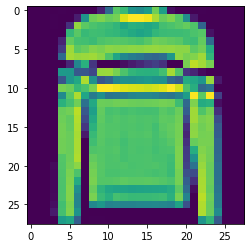

In [8]:
plt.imshow(x_train[5])

In [9]:
x_train = tf.expand_dims(x_train,axis=-1)
x_test = tf.expand_dims(x_test,axis=-1)

In [10]:
cnn = keras.Sequential([
    layers.Conv2D(filters=32,kernel_size=3*3,activation="relu",input_shape=(28,28,1)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=3*3,activation="relu",input_shape=(28,28,1)),
    layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(3000,activation="relu"),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [11]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])
cnn.fit(x_train,y_train,epochs=15)


Epoch 1/15


1875/1875 [==============================] - 133s 70ms/step - loss: 0.4754 - accuracy: 0.8255
Epoch 2/15
1875/1875 [==============================] - 125s 67ms/step - loss: 0.3298 - accuracy: 0.8800
Epoch 3/15
1875/1875 [==============================] - 131s 70ms/step - loss: 0.2914 - accuracy: 0.8931
Epoch 4/15
1875/1875 [==============================] - 125s 67ms/step - loss: 0.2656 - accuracy: 0.9022
Epoch 5/15
1875/1875 [==============================] - 125s 67ms/step - loss: 0.2447 - accuracy: 0.9076
Epoch 6/15
1875/1875 [==============================] - 131s 70ms/step - loss: 0.2287 - accuracy: 0.9137
Epoch 7/15
1875/1875 [==============================] - 129s 69ms/step - loss: 0.2141 - accuracy: 0.9185
Epoch 8/15
1875/1875 [==============================] - 133s 71ms/step - loss: 0.2004 - accuracy: 0.9243
Epoch 9/15
1875/1875 [==============================] - 145s 77ms/step - loss: 0.1894 - accuracy: 0.9272
Epoch 10/15
1875/1875 [=============================

In [12]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [13]:
y_pred=[np.argmax(i) for i in y_pred]

In [14]:
classes[y_pred[1]]

'Pullover'

In [15]:
classes[y_test[1]]

'Pullover'

In [17]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3797 - accuracy: 0.8962


[0.37965869903564453, 0.8962000012397766]

<AxesSubplot:>

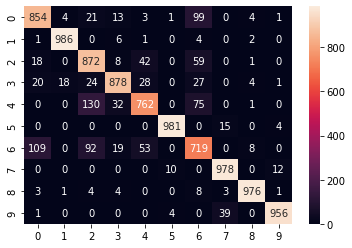

In [19]:
import seaborn as sns
sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=y_pred),annot=True,fmt='d')

In [20]:
def image_eval(x_test,y_test,y_pred,i):
  plt.imshow(x_test[i])
  plt.xlabel(f"y_pred:{classes[y_pred[i]]} , y_test:{classes[y_test[i]]}")

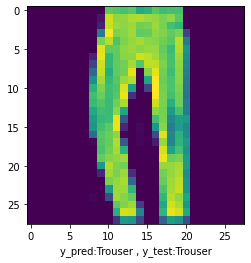

In [21]:
image_eval(x_test,y_test,y_pred,5)

### LSTM

Write a Python program that reads the spam.csv  file into a DataFrame, where the dataset contains data of different mails and is classified into spam and not spam, the following are the tasks that are to be taken into consideration  while  constructing  LSTM  model,  to  predict  binary  classification using given data:

1.Load the given dataset into a DataFrame (use delimiter as “,” and encoding  as  “latin-1”)  Ex..pd.read_csv('file   name',delimiter='   , ',encoding='latin-1')

2.Drop all “unnamed” columns and do missing value analysis for the remaining columns 

3.Use the count plot and check the balance of the target variable (“V1” is our target variable.)

4.Split the datainto X and Y as per independent and dependent variable

5.Do label encoding for the target variable and reshape its array into 2D format

6.Split the data into train and test as a 20% test size

7.Generate tokens (max words = 1000) then convert them into numbers (text to sequence) and do padding as 150 for both train and test data.

8.Create  a  new  function  and  declare  LSTM  and  all  other  layers  of  your 


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [25]:
spam=pd.read_csv("spam.csv",delimiter=",",encoding='latin-1')

In [26]:
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [27]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


<AxesSubplot:xlabel='v1', ylabel='count'>

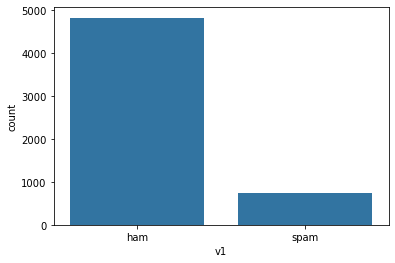

In [28]:
sns.countplot(data=spam,x=spam['v1'])

In [29]:
x=spam['v2']
y=spam['v1']

In [30]:
lb=LabelEncoder()

In [31]:
y=lb.fit_transform(y)

In [32]:
y=y.reshape(-1,1)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
token=Tokenizer(num_words=1000)

In [36]:
token.fit_on_texts(x_train)

In [37]:
k=len(token.word_index)+1
k

7955

In [38]:
x_train_tokenized=[]
x_train_tokenized=token.texts_to_sequences(x_train)

In [39]:
x_train_tokenized

[[38, 30, 8, 5, 273, 81, 116, 26, 11, 322, 10, 53, 18, 299, 30, 349],
 [799, 15, 192, 171, 12, 98, 44, 195, 21, 9, 4, 203, 225],
 [113, 83, 4, 672, 350, 2],
 [673, 1, 40, 41],
 [800,
  13,
  394,
  801,
  12,
  395,
  925,
  926,
  221,
  1,
  441,
  674,
  16,
  862,
  442,
  802,
  545],
 [443, 406, 3, 300, 675, 13, 422],
 [48, 863, 262],
 [36, 195, 8, 4, 287, 35, 111, 301, 53],
 [167, 1, 58, 8, 500, 3, 250],
 [600, 288, 57, 31, 864, 196, 865],
 [139, 327, 20, 178, 179],
 [351, 316, 4, 322, 48, 36],
 [30, 256, 75, 43, 352],
 [46],
 [31, 105, 52, 176, 11, 636, 72, 75, 340],
 [91,
  803,
  62,
  117,
  6,
  423,
  4,
  211,
  35,
  4,
  142,
  147,
  145,
  236,
  546,
  188,
  6,
  118,
  8,
  637,
  501,
  23,
  502,
  212],
 [33, 3, 547, 14, 5, 273, 365, 5, 927, 113, 84, 638, 8, 520, 366, 520, 74, 62],
 [56, 168, 548, 16, 10, 323],
 [94, 367, 31, 3, 407, 154, 10, 26, 5, 18, 14, 148, 36, 150, 18, 5, 128],
 [102, 132, 25, 5, 302, 23, 95, 37, 29, 257, 35, 166, 156, 145, 30, 266],
 [134

In [40]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [41]:
padded_seq=pad_sequences(x_train_tokenized,padding="pre",maxlen=150)

In [42]:
y.shape

(5572, 1)

In [43]:
padded_seq

array([[  0,   0,   0, ..., 299,  30, 349],
       [  0,   0,   0, ...,   4, 203, 225],
       [  0,   0,   0, ..., 672, 350,   2],
       ...,
       [  0,   0,   0, ..., 685, 239,  30],
       [  0,   0,   0, ..., 763,   1, 255],
       [  0,   0,   0, ...,   8, 290, 175]])

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Embedding

In [45]:
model=Sequential()
model.add(Embedding(k,100,input_length=150)),
model.add(LSTM(100)),
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          795500    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 876001 (3.34 MB)
Trainable params: 876001 (3.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
model.fit(padded_seq,y_train,epochs=10)

Epoch 1/10
140/140 [==============================] - 14s 84ms/step - loss: 0.1783 - accuracy: 0.9381
Epoch 2/10
140/140 [==============================] - 13s 90ms/step - loss: 0.0383 - accuracy: 0.9897
Epoch 3/10
140/140 [==============================] - 14s 103ms/step - loss: 0.0196 - accuracy: 0.9951
Epoch 4/10
140/140 [==============================] - 12s 89ms/step - loss: 0.0133 - accuracy: 0.9960
Epoch 5/10
140/140 [==============================] - 13s 90ms/step - loss: 0.0096 - accuracy: 0.9973
Epoch 6/10
140/140 [==============================] - 12s 87ms/step - loss: 0.0066 - accuracy: 0.9984
Epoch 7/10
140/140 [==============================] - 12s 87ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 8/10
140/140 [==============================] - 12s 84ms/step - loss: 0.0026 - accuracy: 0.9996
Epoch 9/10
140/140 [==============================] - 12s 84ms/step - loss: 0.0105 - accuracy: 0.9964
Epoch 10/10
140/140 [==============================] - 12s 85ms/step - loss: 0.00

In [61]:
token.fit_on_texts(x_test)

In [60]:
x_test=token.texts_to_sequences(x_test)

In [57]:
padded_seq_test=pad_sequences(x_test,padding="pre",maxlen=150)

In [58]:
y_pred=model.predict(padded_seq_test)

35/35 [==============================] - 1s 24ms/step


In [59]:
model.evaluate(padded_seq_test,y_test)

35/35 [==============================] - 2s 24ms/step - loss: 0.9939 - accuracy: 0.8565


[0.9939324855804443, 0.8565022349357605]